<a href="https://colab.research.google.com/github/ADerudder/Matematica/blob/main/Transformada_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import UnivariateSpline # para interpolar


from scipy.fftpack import fft, fftfreq
#plt.rcparams preguntar 

In [ ]:
plt.rcParams["figure.figsize"] = (11,6)
plt.rcParams.update({'font.size': 14})

In [ ]:
x=np.linspace(0,10,500)
f=np.sin(2*np.pi*4*x) + 3*np.sin(2*np.pi*6*x) + 5*np.sin(2*np.pi*x)

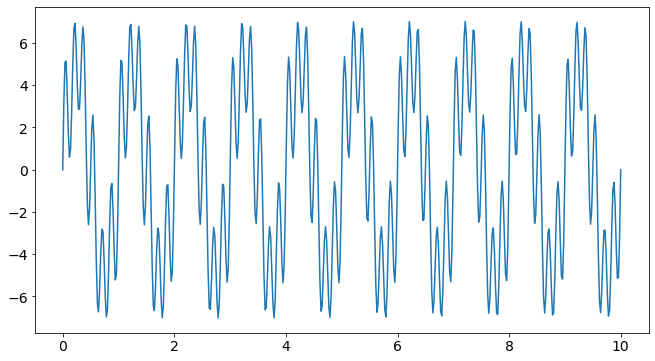

In [ ]:
plt.plot(x,f)

In [ ]:
transformada_0 = np.fft.fft(f)

In [ ]:
largo = len(x) # miro la cantidad de elementos que tiene el vector de tiempos
d_tiempo = np.mean(np.diff(x)) # miro los diferenciales de tiempo entre mediciones
frecuencia = np.fft.fftfreq(largo,d_tiempo)
# frecuencia_max = 1 / d_tiempo # pregunta: ¿tiene sentido que la frecuencia máxima sea esta y no otra?
# frecuencia = np.linspace(0, frecuencia_max, largo) # mi vector de frecuencias va de cero hasta la frecuencia máxima
#y es del mismo largo que todos las demás
transformada = np.abs(transformada_0) # le tomo el valor absoluto a la transformada,
#para este análisis en particular no son de interés las fases relativas entre componentes.

In [ ]:
frecuencia = frecuencia[np.arange(largo//2)]
transformada = transformada[np.arange(largo//2)]

# descomentar abajo para almacenar el archivo
np.savetxt('transformada.txt', np.transpose([frecuencia,transformada]), delimiter='\t', header='Frecuencia (Hz) \t Transformada')

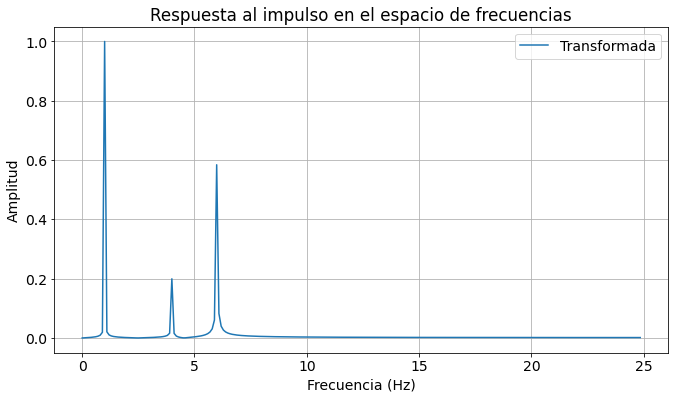

In [ ]:
plt.figure()
plt.title('Respuesta al impulso en el espacio de frecuencias')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.plot(frecuencia, transformada/np.max(transformada), label='Transformada')
plt.legend()
plt.grid(True)
#plt.savefig("transformada.pdf") # descomentar si se quiere almacenar la figura
plt.show()

In [ ]:
index_pico = np.argmax(transformada[1:]) # me da la ubicación del máximo y descarto el primer elemento porque es la componente de tensión continua.
index_pico = index_pico + 1 # al descartar el primero se me corre todo un lugar hacia la izquierda.
pico = frecuencia[index_pico] # vemos a qué frecuencia corresponde.
error = (frecuencia[index_pico+1]-frecuencia[index_pico-1])/4 # tomo como error la mitad de distancia hasta el siguiente punto.
print('Máximo encontrado en (' + str(round(pico)) +  u' \u00B1 ' + str(round(error)) + ') Hz') 

Máximo encontrado en (1 ± 0) Hz


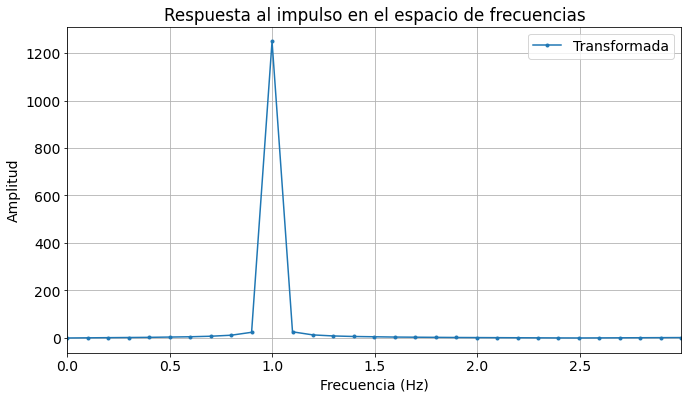

In [ ]:
intervalo_f = [pico-20*error,pico+40*error] # selecciono los puntos que quiero mostrar

plt.figure()
plt.title('Respuesta al impulso en el espacio de frecuencias')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.plot(frecuencia, transformada, '.-', label='Transformada')
#plt.yscale('log')
plt.xlim(intervalo_f)
plt.legend()
plt.grid(True)
#plt.savefig("transformada_zoom.pdf") # descomentar si se quiere almacenar la figura
plt.show()